In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 


In [2]:
data = pd.read_csv(r'/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv', index_col='Serial No.')


In [3]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [4]:
y = data['Chance of Admit ']
x= data.drop('Chance of Admit ',axis=1)


In [5]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1


In [6]:
pca = PCA(n_components=2)
pca.fit(x)
X_PCA = pca.transform(x)

In [7]:
X_PCA= pd.DataFrame(X_PCA, columns=['PC1','PC2']) 

In [8]:
X_PCA

,PC1,PC2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


Text(0, 0.5, 'PC2')

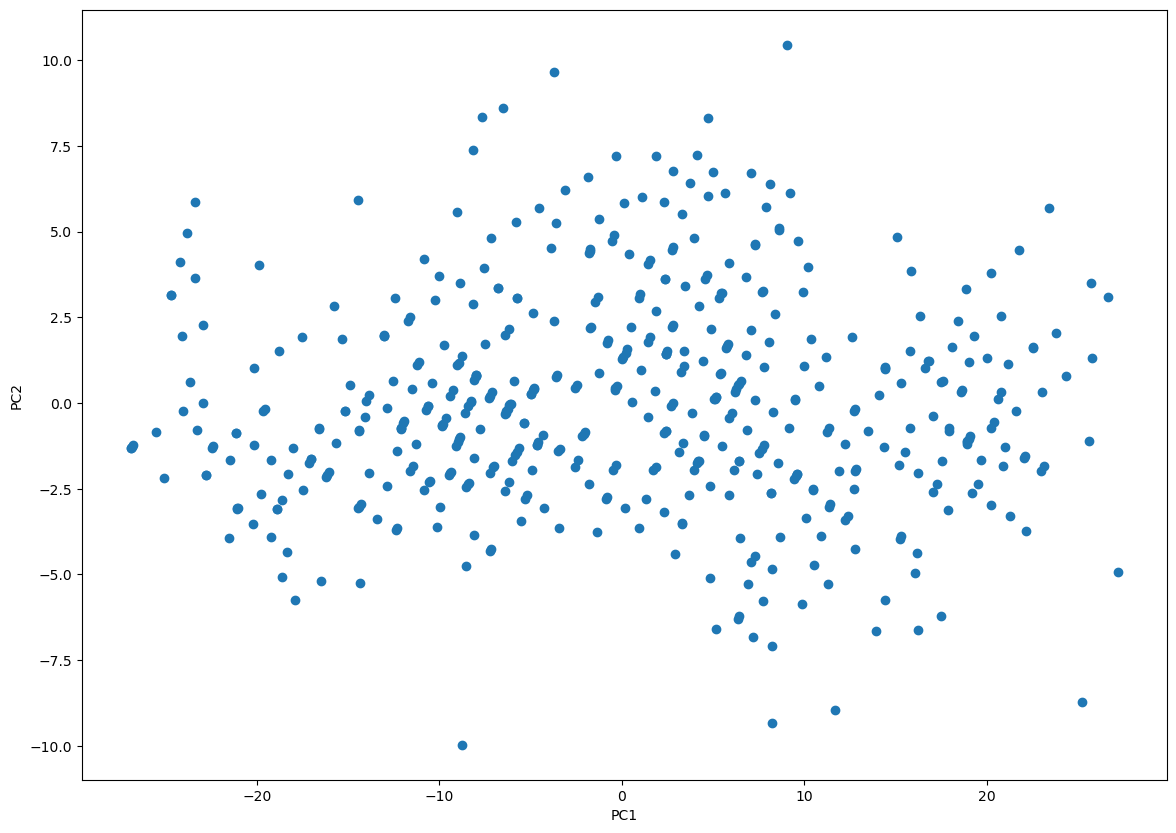

In [9]:
plt.figure(figsize=(14,10))
plt.scatter(X_PCA['PC1'],X_PCA['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [10]:
PCA_max = np.argmax(X_PCA['PC1'])
PCA_min= np.argmin(X_PCA['PC1'])

print(PCA_max)
print(PCA_min)

377
202


In [11]:
x.iloc[PCA_max, :]


GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [12]:
x.iloc[PCA_min, :]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 203, dtype: float64

In [13]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [14]:
x_train, x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,shuffle=True)

In [15]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
model.score(x_test,y_test)

0.8140664125471595

In [17]:
pred = model.predict(x_test)

Text(0, 0.5, 'actual value')

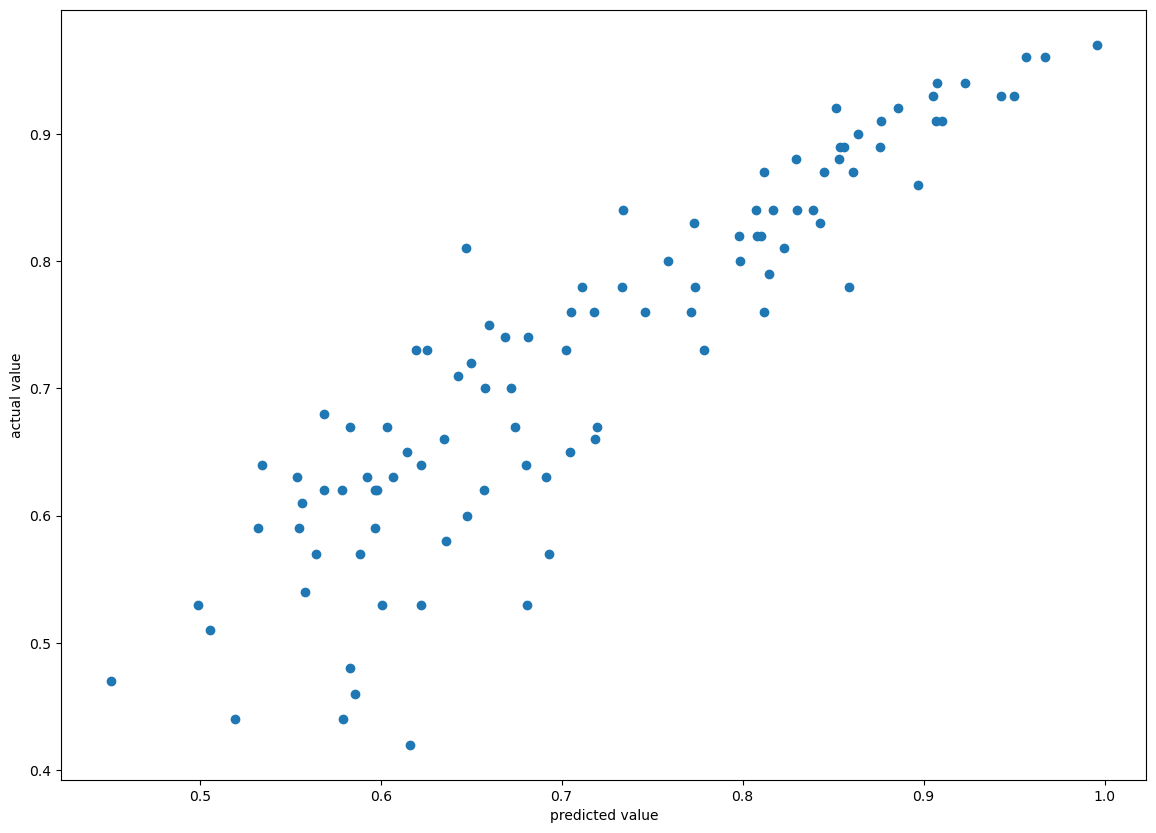

In [18]:
plt.figure(figsize=(14,10))
plt.plot(pred, y_test, "o")
plt.xlabel('predicted value')
plt.ylabel('actual value')